In [2]:
!pip install -U spacy -q

In [3]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.2                         
Location         /usr/local/lib/python3.10/dist-packages/spacy
Platform         Linux-6.1.58+-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines        en_core_web_sm (3.7.1)        



In [4]:
import spacy
from spacy.tokens import DocBin
from tqdm import tqdm

nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import json
f = open('/content/drive/MyDrive/project-Utilities/testData.json', 'r+', encoding="utf-8" )   # repeat to load (train, test and validation data)
TRAIN_DATA = json.load(f)

In [ ]:
for text, annot in tqdm(TRAIN_DATA ['annotations']) :
    doc = nlp.make_doc(text)
    ents = []
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract" )
        if span is None:
          print ("Skipping entity")
        else:
          ents.append(span)
    doc.ents = ents
    db.add(doc)
db.to_disk("/content/drive/MyDrive/project-Utilities/testData.spacy") # save the docbin object

100%|██████████| 1/1 [00:00<00:00, 29.15it/s]


In [5]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [6]:
!python -m spacy init config config.cfg -l en -p ner -o accuracy -G -pt -F

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: accuracy
- Hardware: GPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy download en_core_web_lg

In [8]:
!python -m spacy train config.cfg --output /content/drive/MyDrive/project-Utilities --paths.train /content/drive/MyDrive/project-Utilities/train_data.spacy --paths.dev /content/drive/MyDrive/project-Utilities/validation_data.spacy --gpu-id 0

ℹ Saving to output directory:
/content/drive/MyDrive/project-Utilities
ℹ Using GPU: 0

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00   7588.33    1.76    4.92    1.07    0.02
200     200        213.51  103059.66   99.46   99.17   99.76    0.99
400     400         30.27     87.58   99.58   99.52   99.64    1.00
600     600         35.39     46.95   99.64   99.52   99.76    1.00
800     800         15.32     15.23   99.58   99.52   99.64    1.00
1000    1000         10.70      9.40   99.58   99.52   99.64    1.00
1200    1200        111.40     96.19   99.52   99.29   99.76    1.00
1400    1400         74.56     67.74   99.52   99.40   99.6

*   The E and # columns are for the number of epochs and number of steps respectively
*   The values for 'LOSS TOK2VEC' and 'LOSS NER' are the loss values for the token-to-vector and named entity recognition steps in your pipeline.

*   The ENTS_F, ENTS_P, and ENTS_R column indicate the values for the F-score, precision, and recall for the named entities task
*  The score column shows the overall score of the pipeline

In [9]:
nlp = spacy.load("/content/drive/MyDrive/project-Utilities/model-best")

Installing EasyOCR

In [ ]:
!pip install easyocr

In [11]:
import matplotlib.pyplot as plt
import cv2
import easyocr
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize'] = 20, 20

In [12]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

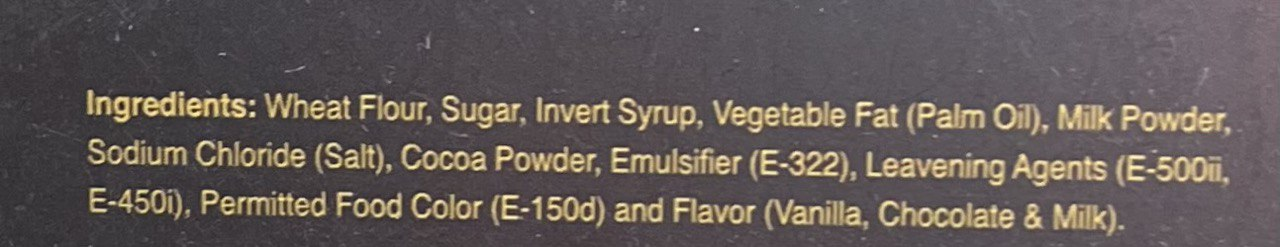

In [14]:
Image("/content/drive/MyDrive/project-Utilities/test_product/test_img (15).jpg")

In [15]:
output = reader.readtext('/content/drive/MyDrive/project-Utilities/test_product/test_img (15).jpg')

In [16]:
for item in output:
  print(item)

([[78, 86], [1238, 86], [1238, 142], [78, 142]], 'Ingredients: Wheat Flour; Sugar, Invert Syrup, Vegetable Fat (Palm Oil) , Milk Powder;', 0.6999710789516742)
([[80, 130], [1239, 130], [1239, 195], [80, 195]], 'Sodium Chloride (Salt) , Cocoa Powder; Emulsifier (E 322), Leavening Agents (E 300i;', 0.2623207180076894)
([[80, 180], [1128, 180], [1128, 241], [80, 241]], 'E.450i) , Permitted Food Color (E-150d) and Flavor (Vanilla, Chocolate & Milk) .', 0.5126949043358916)


In [17]:
for item in output:
  print(item[1].strip())

Ingredients: Wheat Flour; Sugar, Invert Syrup, Vegetable Fat (Palm Oil) , Milk Powder;
Sodium Chloride (Salt) , Cocoa Powder; Emulsifier (E 322), Leavening Agents (E 300i;
E.450i) , Permitted Food Color (E-150d) and Flavor (Vanilla, Chocolate & Milk) .


In [18]:
tokens = []
for token in output:
    if isinstance(token, str):
        tokens.append(token)
    elif isinstance(token, tuple):
        token_str = ' '.join([str(elem) for elem in token if isinstance(elem, str)])
        tokens.append(token_str)
    elif isinstance(token, list):
        tokens.extend(token)
doc = nlp(' '.join(tokens))

In [19]:
doc

Ingredients: Wheat Flour; Sugar, Invert Syrup, Vegetable Fat (Palm Oil) , Milk Powder; Sodium Chloride (Salt) , Cocoa Powder; Emulsifier (E 322), Leavening Agents (E 300i; E.450i) , Permitted Food Color (E-150d) and Flavor (Vanilla, Chocolate & Milk) .

In [20]:
spacy.displacy.render(doc, style = "ent", jupyter = True) # display in jupyter

In [21]:
!python -m spacy evaluate /content/drive/MyDrive/project-Utilities/model-best /content/drive/MyDrive/project-Utilities/testData.spacy --gpu-id 0

ℹ Using GPU: 0

================================== Results ==================================

TOK     100.00
NER P   95.71 
NER R   97.10 
NER F   96.40 
SPEED   796   


=============================== NER (per type) ===============================

                  P       R       F
ADDED SUGAR   95.71   97.10   96.40



In [22]:
import matplotlib.pyplot as plt

def show_graph(precision, recall, fscore):
    # Prepare the data
    metrics = ['Precision', 'Recall', 'F-score']
    values = [precision, recall, fscore]

    # Create the bar chart
    plt.bar(metrics, values)
    plt.ylim(0, 100)  # Set the y-axis range from 0 to 1
    plt.title('Performance Metrics')
    plt.xlabel('Metrics')
    plt.ylabel('Value')
    plt.show()


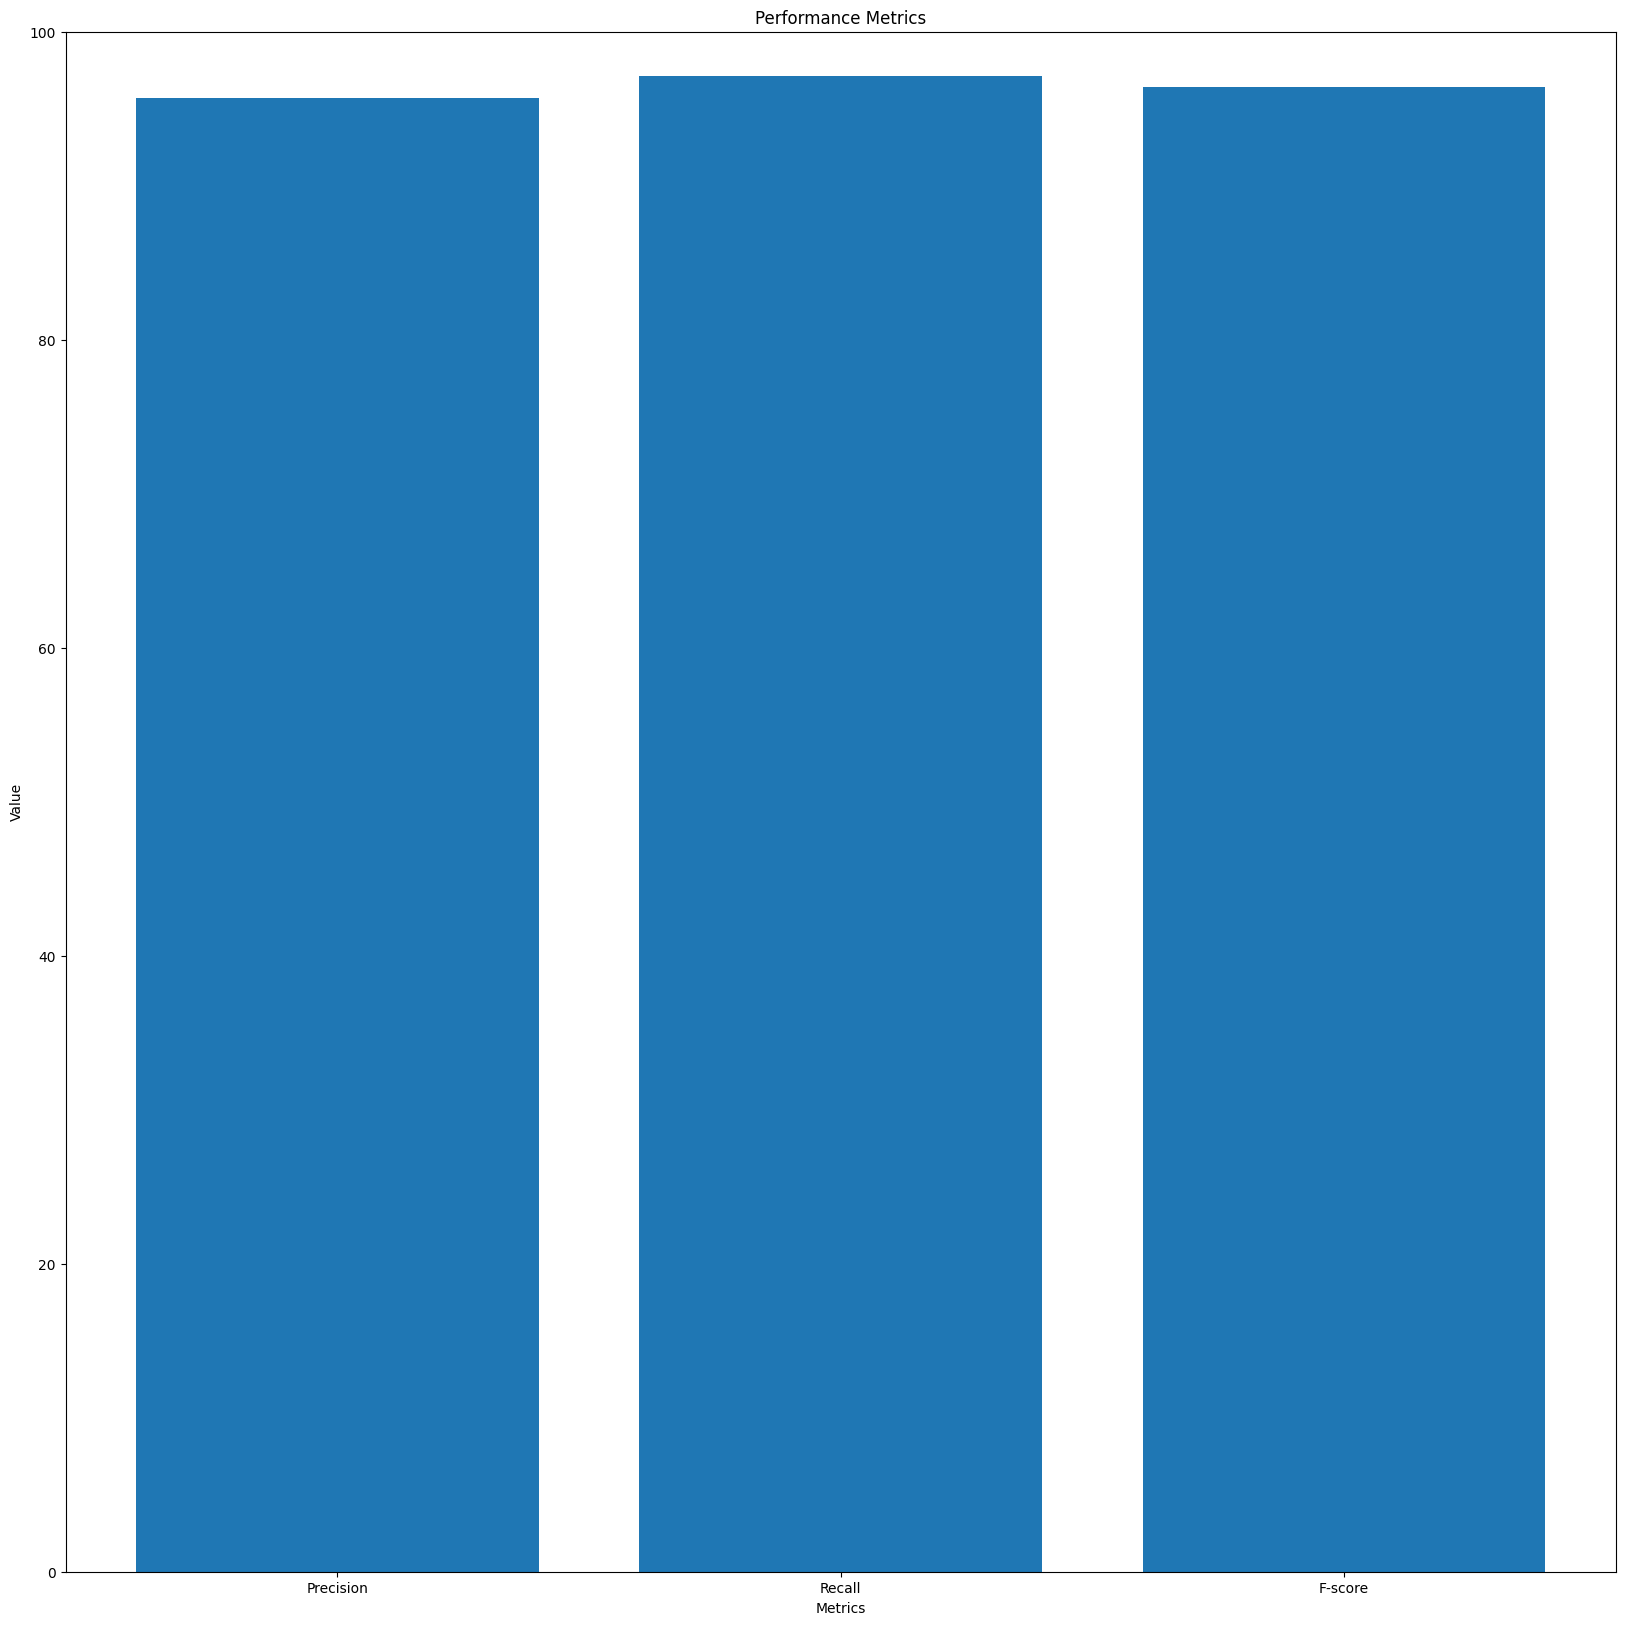

In [23]:
precision = 95.71
recall = 97.10
fscore = 96.40

show_graph(precision, recall, fscore)
